In [17]:
!pip install mlxtend==0.21.0
!pip install tqdm==4.64.1

In [2]:
# Import libraries

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder  

# Show plots inside the jupyter notebook
%matplotlib inline

In [3]:
# Read the dataset

df = pd.read_csv("supermarket.csv")
df.head()

,Customer Id,Date,Product
0,JKML5ZWXP0XQ,2020-07-20,tropical fruit
1,YOGWQIUPDAJ7,2020-04-30,whole milk
2,Q3NL22281AF6,2020-09-18,pip fruit
3,C59GRTLMZQAU,2020-12-11,other vegetables
4,WUSF8LTEQZ5L,2020-01-02,whole milk


In [20]:
# Add extra columns

df["Date"] = pd.to_datetime(df["Date"])
df["extra_date"] = df["Date"]
df["year"] = df['Date'].dt.year
df["weekday"] = df['Date'].dt.day_name()

# Set "Date" as index
df = df.set_index(['Date'])

print(f"Number of rows are: {df.shape[0]}")

df.head()

Number of rows are: 32710


,Customer Id,Product,extra_date,year,weekday
Date,,,,,
2020-07-20,JKML5ZWXP0XQ,tropical fruit,2020-07-20,2020,Monday
2020-04-30,YOGWQIUPDAJ7,whole milk,2020-04-30,2020,Thursday
2020-09-18,Q3NL22281AF6,pip fruit,2020-09-18,2020,Friday
2020-12-11,C59GRTLMZQAU,other vegetables,2020-12-11,2020,Friday
2020-01-02,WUSF8LTEQZ5L,whole milk,2020-01-02,2020,Thursday


In [21]:
# Number of unique products
unique_products = df.Product.nunique()
print("There are {} unique products sold ".format(unique_products))

There are 137 unique products sold 


In [22]:
# Average number of sold products per day
total_days = df.index.nunique()
total_products = len(df)
average_products = total_products / total_days

print("With an average of {:.2f} items sold daily".format(average_products))

With an average of 44.93 items sold daily


In [23]:
# Products were sold less than others

df.Product.value_counts().tail(5).sort_values()

kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
frozen chicken           5
Name: Product, dtype: int64

In [24]:
# Top 5 customers with highest number of baskets in 2020
df[df.year==2020].groupby("Customer Id")["extra_date"].nunique().sort_values(ascending=False).head(6)

Customer Id
M722MPITBY07    7
E7FD9BU4OK0F    7
0ZRF32AJ06BC    7
M2DT2Z00NQCH    7
QBUS9NZY39BE    7
XBLCKC8GC1QQ    6
Name: extra_date, dtype: int64

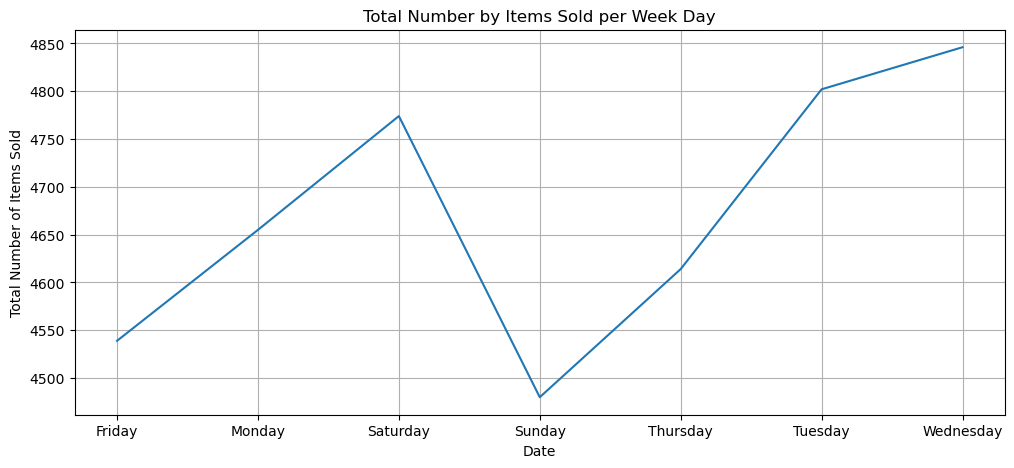

In [25]:
# Day with the highest number of sold products


df.groupby("weekday")["Product"].count().plot(figsize=(12,5), grid=True, title="Total Number by Items Sold per Week Day").set(xlabel="Date", ylabel="Total Number of Items Sold");

# Association Rule Mining

In [26]:
# Create transaction list

transactions = [record[1]['Product'].tolist() for record in list(df.groupby(['Customer Id','Date']))]
transactions

[['rolls/buns', 'brown bread', 'dessert'],
 ['root vegetables', 'flour'],
 ['salty snack', 'bottled beer'],
 ['domestic eggs'],
 ['white bread'],
 ['rolls/buns', 'sauces'],
 ['white bread'],
 ['frozen fish', 'whole milk'],
 ['baking powder', 'soda'],
 ['whole milk'],
 ['long life bakery product', 'hard cheese'],
 ['waffles', 'pudding powder'],
 ['grapes', 'hard cheese'],
 ['root vegetables', 'white bread'],
 ['yogurt', 'butter milk'],
 ['ketchup'],
 ['curd', 'processed cheese'],
 ['root vegetables', 'grapes', 'white bread', 'dishes'],
 ['tropical fruit'],
 ['turkey', 'whole milk', 'citrus fruit', 'pastry', 'soda'],
 ['organic sausage', 'UHT-milk'],
 ['rolls/buns'],
 ['pip fruit', 'root vegetables'],
 ['whole milk', 'finished products', 'beef'],
 ['rolls/buns', 'sliced cheese'],
 ['other vegetables', 'frozen meals'],
 ['whole milk', 'candy'],
 ['citrus fruit', 'whole milk', 'sliced cheese'],
 ['chicken', 'rolls/buns'],
 ['chicken', 'rolls/buns'],
 ['pip fruit', 'hamburger meat', 'butter

In [27]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

baskets = pd.DataFrame(te_ary, columns=te.columns_)
baskets

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,tea,toilet cleaner,tropical fruit,turkey,waffles,whipped/sour cream,white bread,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14748,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
14749,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14750,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14751,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# Calculate "support"

freq_items = apriori(baskets, min_support=0.01, use_colnames=True)
freq_items

,support,itemsets
0,0.021691,(UHT-milk)
1,0.034434,(beef)
2,0.022097,(berries)
3,0.016810,(beverages)
4,0.045957,(bottled beer)
5,0.061547,(bottled water)
6,0.038162,(brown bread)
7,0.035722,(butter)
8,0.017827,(butter milk)
9,0.014573,(candy)


In [29]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

freq_items.sort_values(by="support", ascending=False).head(5)

,support,itemsets,length
51,0.160171,(whole milk),1
33,0.123839,(other vegetables),1
37,0.111571,(rolls/buns),1
42,0.098488,(soda),1
52,0.087101,(yogurt),1


In [30]:
freq_items.sort_values(by="length", ascending=False).head(5)

,support,itemsets,length
57,0.011320,"(yogurt, whole milk)",2
56,0.011794,"(whole milk, soda)",2
55,0.014167,"(whole milk, rolls/buns)",2
54,0.015048,"(other vegetables, whole milk)",2
53,0.010710,"(other vegetables, rolls/buns)",2


In [31]:
# Calculate "confidence"

rules = association_rules(freq_items, metric="confidence", min_threshold=0.1,)
# rules
rules[["antecedents","consequents","support","confidence"]].sort_values(by="confidence", ascending=False).head(5)

,antecedents,consequents,support,confidence
3,(yogurt),(whole milk),0.011320,0.129961
1,(rolls/buns),(whole milk),0.014167,0.126974
0,(other vegetables),(whole milk),0.015048,0.121511
2,(soda),(whole milk),0.011794,0.119752
